In [9]:
import music21 as m21
import Modules as m
import itertools
import functools
import numpy as np

In [10]:
def _CombineChordList2(list1,list2):
    return list(list1)+list([ ])+list(list2)

def CombineChordLists(list_of_chordlist):
    return functools.reduce(_CombineChordList2,list_of_chordlist)

In [11]:
def GroupChordByBeatInMeasure(measure):
    measure = measure.getElementsByClass('Chord')
    total_beat = int(max(map(lambda chord: chord.beat,measure),default=0))
    pitchnames = [[x.nameWithOctave for x in c] for c in [x.pitches for x in measure]]
    durations = [[x.duration.quarterLength] for x in measure]
    measure_by_beat = list(map(lambda pitchnames,durations:[pitchnames]+[durations], pitchnames, durations))
    chord_by_beat = [[] for x in range(total_beat)]
    for i in range(len(measure)):
        chord_by_beat[int(measure[i].beat)-1].append(measure_by_beat[i])

    return list(chord_by_beat)

def GroupChordByBeatInScore(score):
    measures = score.chordify().getElementsByClass('Measure')
    measurelist = m.helperfuncs.F(GroupChordByBeatInMeasure,measures)
    flattened_measures = [y for x in measurelist for y in x]
    return flattened_measures

In [12]:
test_scores = list(m21.corpus.chorales.Iterator(1,100))

test_scores_transposed = [m.ScoreAbstraction.TransposeToCIndividual(x) for x in test_scores]

test_Chordlist = CombineChordLists([GroupChordByBeatInScore(x) for x in test_scores_transposed])

In [13]:
len(test_Chordlist)

5154

In [14]:
uniquechords = list(np.unique(test_Chordlist))
len(uniquechords)

2867

In [15]:
#[x for x in uniquechords if test_Chordlist.count(x)>2]

In [34]:
markov_result = m.Markov_v2.Markov_model(test_Chordlist,10)

In [35]:
markov_result

[[[['A2', 'C3', 'G3', 'C4'], [0.5]], [['A2', 'C3', 'F#3', 'C4'], [0.5]]],
 [[['B2', 'G3', 'D4'], [0.5]], [['G2', 'F3', 'G3', 'D4'], [0.5]]],
 [[['D3', 'F#3', 'A3'], [0.5]], [['C3', 'D3', 'F#3', 'A3'], [0.5]]],
 [[['G2', 'B2', 'D3', 'G3'], [1.0]]],
 [[['G2', 'D3', 'B3', 'D4'], [0.5]],
  [['F#2', 'E3', 'B3', 'D4'], [0.25]],
  [['F#2', 'F#3', 'B3', 'D4'], [0.25]]],
 [[['D2', 'F3', 'A3', 'F4'], [0.5]], [['D2', 'F3', 'B3', 'F4'], [0.5]]],
 [[['E2', 'G3', 'C4', 'E4'], [0.5]], [['F2', 'G3', 'C4', 'E4'], [0.5]]],
 [[['G2', 'G3', 'B3', 'D4'], [1.0]]],
 [[['C2', 'C3', 'G3', 'E4'], [0.5]], [['C2', 'B-2', 'G3', 'D4'], [0.5]]],
 [[['C2', 'G3', 'C4', 'E4'], [1.0]]]]

In [47]:
def GeneratedStream(markov_result):
    generated_stream = m21.stream.Stream()
    for i in range(len(markov_result)):
        if len(markov_result[i])!=0:
            generated_stream.append(m21.tempo.MetronomeMark(referent=0.5,number=60))
            generated_stream.append([m21.chord.Chord(x[0],quarterLength=x[1][0]) for x in markov_result[i]])
        if len(markov_result[i])==0:
            generated_stream.append(m21.tempo.MetronomeMark(referent=0.5,number=60))
            generated_stream.append([m21.note.Rest(quarterLength=1.0)])
    return generated_stream

In [48]:
generated_seq = GeneratedStream(markov_result)

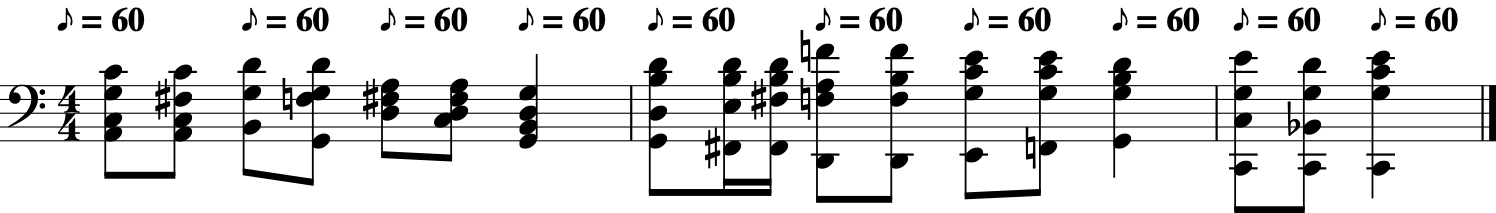

In [49]:
generated_seq.show()

In [50]:
GeneratedStream(markov_result).show('midi')